$ Leyendo \ los \ datos $


In [2]:
import pandas as pd
import numpy as np
from PIL import Image    
import cv2
datos = pd.read_csv("train_labels.csv")
#test = pd.read_csv("sample_submission.csv")
print(datos.shape) #tamaño incluyendo la cabecera
#print(test.shape)
import torch
def Readimage(epoch, n):
    X_train = []
    for i in range(n):
        path = "train/" + datos.iloc[i+n*epoch][0]+ ".tif"
        img = cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_train.append(img)
    X_train=np.reshape(X_train, (n, 27648))
    X_train=torch.tensor(X_train).float()
   
    return(X_train)
def Readimagetest(i):
        path = "test/" + test.iloc[i][0]+ ".tif"
        img = cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_test=img
        X_test=np.reshape(X_test, (1,27648))
        X_test=torch.tensor(X_test)
   
        return(X_test)



(220025, 2)


In [4]:
import torch
import matplotlib.pyplot as plt 
mean=[]
for i in range(4):
    X_train = Readimage(i,55006)
    mean.append(X_train.mean(axis=1)) 
mean=np.asarray(mean)
plt.boxplot(mean)                                     #Buscamos posibles outliers
Q1 =  np.quantile(mean,0.25)
Q3 = np.quantile(mean,0.75)
IQR=Q3-Q1
x=np.where((mean < Q1-1.5*IQR ) | (mean > Q3+1.5*IQR))
print(x)

ValueError: only one element tensors can be converted to Python scalars

In [37]:
print(mean.shape)
a=np.concatenate([np.asarray(mean[0]),np.asarray(mean[1])])
b=np.concatenate([np.asarray(mean[2]),np.asarray(mean[3])])
mean = np.concatenate([a, b])
plt.boxplot(mean)                                     #Buscamos posibles outliers
Q1 =  np.quantile(mean,0.25)
Q3 = np.quantile(mean,0.75)
IQR=Q3-Q1
x=np.where((mean < Q1-1.5*IQR ) | (mean > Q3+1.5*IQR))



(220024,)


ValueError: zero-dimensional arrays cannot be concatenated

5033


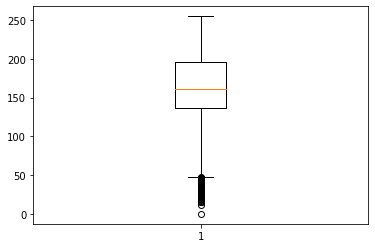

In [49]:
plt.boxplot(mean)                                     #Buscamos posibles outliers
Q1 =  np.quantile(mean,0.25)
Q3 = np.quantile(mean,0.75)
IQR=Q3-Q1
x=np.where((mean < Q1-1.5*IQR ) | (mean > Q3+1.5*IQR))
x=np.asarray(x)
x=np.reshape(x, (203))
print(x[0])

In [53]:
220024/4
print(enumerate(x[0:3]))

(203,)


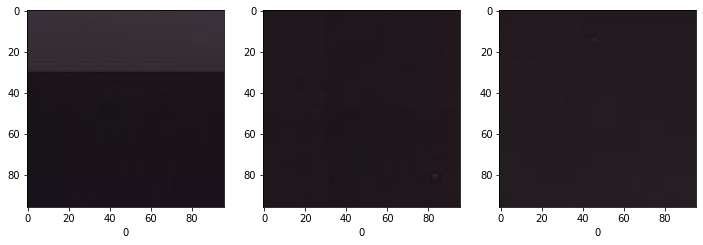

In [63]:
print(x.shape)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
fig, ax= plt.subplots(1, 3, figsize=(12,8))   #Vemos algunos ejemplos
for i, idx in enumerate(x[0:3]):
    path = "train/" + datos.iloc[idx][0] +".tif"
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].set_xlabel(datos.iloc[idx][1])
#x=np.asarray(x)



In [65]:
newdata= datos.drop(x)                #Eliminamos los outliers de nuestro dataset
print(newdata.shape)
newdata.to_csv('newdata.csv')

(219822, 2)


In [68]:
print(x)

[  5033   5321   6824  11031  12201  12771  14587  15029  15180  17649
  20283  20560  20731  25504  25667  26688  27762  31135  32627  33108
  33928  34777  35060  35605  36158  38679  44448  49079  49750  50149
  51254  51850  52769  52870  53159  53941  55026  56823  57852  58192
  59500  59629  61292  62142  62312  63578  64577  65100  66237  66752
  70377  71770  72384  72588  73153  73245  75005  76960  77731  78040
  78067  78572  79037  81029  81173  81454  83597  84299  86113  88070
  88097  88271  89399  90420  91784  92019  92119  94237  94930  98940
  98942  99019  99502 100118 100607 100729 101425 103225 104560 105015
 106872 106904 106955 107593 107796 108135 108490 108932 109494 110737
 112870 113009 113910 114085 114351 114511 114605 115791 118837 119027
 120750 121898 122970 123453 124161 128396 130357 131792 132055 132191
 134403 135239 138245 140878 141505 141714 141783 144091 146172 146184
 146469 147033 147125 148864 150720 152911 154438 155990 156671 157229
 15882

In [75]:
y =np.asarray([5033,5321,6824,11031,12201,12771,14587,15029,15180,17649
,20283,20560,20731,25504,25667,26688,27762,31135,32627,33108
,33928,34777,35060,35605,36158,38679,44448,49079,49750,50149
,51254,51850,52769,52870,53159,53941,55026,56823,57852,58192
,59500,59629,61292,62142,62312,63578,64577,65100,66237,66752
,70377,71770,72384,72588,73153,73245,75005,76960,77731,78040
,78067,78572,79037,81029,81173,81454,83597,84299,86113,88070
,88097,88271,89399,90420,91784,92019,92119,94237,94930,98940
,98942,99019,99502,100118,100607,100729,101425,103225,104560,105015
,106872,106904,106955,107593,107796,108135,108490,108932,109494,110737
,112870,113009,113910,114085,114351,114511,114605,115791,118837,119027
,120750,121898,122970,123453,124161,128396,130357,131792,132055,132191
,134403,135239,138245,140878,141505,141714,141783,144091,146172,146184
,146469,147033,147125,148864,150720,152911,154438,155990,156671,157229
,158823,159949,161452,163031,164260,164895,166828,169140,169472,169502
,170317,171445,173355,174246,174969,176748,177235,177251,177661,181873
,182088,182159,182319,182626,182821,183047,184913,185347,185386,186238
,186845,187213,189600,189678,189734,190741,191090,191897,191963,192338
,192571,193985,194535,194563,195850,197038,197559,201565,201679,201938
,202481,203883,205541,207039,207364,210140,210792,211058,211678,212397
,213454,214131,216201])
print(y.shape)

(203,)


(array([  1022,   1795,   5294,   6266,   6295,   6685,   7099,   8742,
         8800,   9954,  10720,  11584,  12265,  13100,  15665,  17636,
        20504,  20551,  21446,  21456,  21476,  22110,  22347,  26421,
        27536,  28015,  28408,  28686,  29373,  30982,  31176,  31374,
        31905,  31971,  32432,  33693,  33712,  35714,  35759,  36677,
        37708,  38139,  38830,  40103,  40960,  41374,  45625,  46514,
        47676,  49154,  49288,  52242,  53387,  53499,  53561,  54675,
        55033,  55842,  56463,  57208,  57339,  58152,  58216,  58590,
        58668,  58697,  60489,  60664,  62648,  63516,  63895,  65785,
        66805,  66976,  67609,  69048,  69974,  69987,  70073,  70152,
        71132,  72217,  74293,  74444,  75642,  77293,  78087,  79972,
        80735,  82121,  83003,  83213,  88952,  90047,  90230,  91268,
        92572,  94137,  97766, 101814, 102238, 102792, 103219, 104043,
       108145, 108420, 111183, 111469, 112455, 112466, 114593, 115367,
     

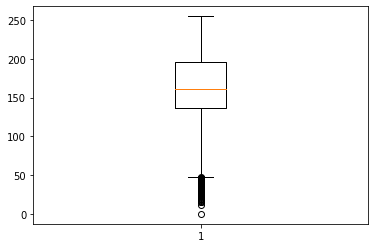

In [5]:
from sklearn.utils import shuffle

Text(0, 0.5, 'Con tumor')

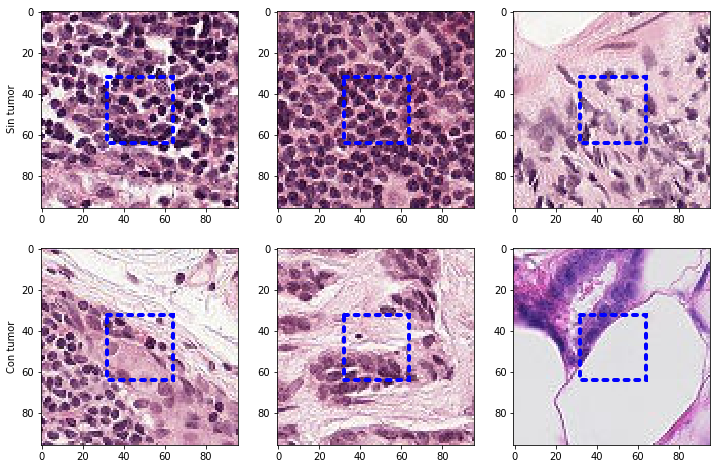

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

fig, ax= plt.subplots(2, 3, figsize=(12,8)) 
for i, idx in enumerate(data[data['label'] == 0]['id'][:3]):
    path = "train/" + idx+ ".tif"
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[0,i].imshow(img)
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
    ax[0, i].add_patch(box)
ax[0, 0].set_ylabel("Sin tumor")
for i, idx in enumerate(data[data['label'] == 1]['id'][:3]):
    path= "train/" + idx+ ".tif"
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[1,i].imshow(img)
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
    ax[1, i].add_patch(box)
ax[1, 0].set_ylabel("Con tumor")

In [2]:
import torch


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(96*96*3, 20)
        self.fc2 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
             
        return F.sigmoid(x)

net = Net()
print(net)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# create a loss function
criterion = nn.CrossEntropyLoss()
from torch.autograd import Variable

for epoch in range(10):
    for i in range(491):
        data=Readimage(i,448)
        data = torch.Tensor(data.float())
        target = torch.Tensor(datos['label'][448*i:448*(i+1)].values)
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target.long())
        loss.mean().backward()
        optimizer.step()
        if i % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, i * len(data), 220024,
                           100. * i / 491, loss.data))



Net(
  (fc1): Linear(in_features=27648, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)


NameError: name 'Readimage' is not defined

In [58]:
print(net_out.data)
print(entrenamiento['label'][2])
print(list(net.parameters()))

tensor([[1., 1.]])
0
[Parameter containing:
tensor([[ 1.3367e-03,  4.1334e-03,  5.7464e-03,  ...,  7.3448e-03,
         -7.5299e-04,  5.1333e-03],
        [ 7.3453e-03,  8.6972e-03,  7.1629e-03,  ...,  1.1049e-02,
         -8.4417e-04,  6.6268e-03],
        [ 9.5808e-03,  4.8231e-03,  3.5008e-03,  ...,  5.8129e-03,
          3.9393e-03,  6.1070e-03],
        ...,
        [-6.1620e-04,  5.2099e-03,  4.0660e-03,  ..., -4.1439e-03,
          5.0997e-03,  4.2421e-03],
        [ 7.4035e-05,  3.2084e-03, -4.7051e-03,  ...,  2.0650e-03,
          4.7582e-03, -4.0307e-03],
        [-5.2621e-03, -3.1646e-03,  6.5843e-04,  ...,  1.7871e-03,
         -5.6036e-03, -2.4252e-03]], requires_grad=True), Parameter containing:
tensor([-0.0023, -0.0012,  0.0003, -0.0017,  0.0007,  0.0042, -0.0035,  0.0002,
        -0.0044,  0.0036,  0.0021, -0.0025, -0.0026, -0.0007,  0.0021,  0.0048,
         0.0036, -0.0027,  0.0040,  0.0029], requires_grad=True), Parameter containing:
tensor([[ 0.0645,  0.0506,  0.161

C:\Users\lenovo\Anaconda3\envs\tfg\lib\site-packages\ipykernel_launcher.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  import sys


KeyboardInterrupt: 

In [80]:
print(net_out)

tensor([[1., 1.]], grad_fn=<SigmoidBackward>)


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(96*96*3, 10)
        self.fc2 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return F.sigmoid(x)
    
    def predict(self,x):
        #Apply softmax to output. 
        pred = F.softmax(self.forward(x))
        ans = []
        #Pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
net=Net()
datos=newdata[:]
val=newdata[:]
for epoch in range(10):
    for i in range(491):
        data=Readimage(i,448)
        data = torch.Tensor(data.float())
        target = torch.Tensor(entrenamiento['label'][448*i:448*(i+1)].values)
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target.long())
        loss.mean().backward()
        optimizer.step()
        if i % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, i * len(data), 220024,
                           100. * i / 491, loss.data))
test_loss = 0
correct = 0
for i in range():
    data=Readimagetest(i)
    data = torch.Tensor(data.float())
    target = val['label'][i+1]
    data=Variable(data)
    with torch.no_grad(): # 1) As do not want to update G 
         net_out = net(data) 
    
    ans = []
   #Pick the class with maximum weight
    if net_out<0.5:
                ans=0
    else:
                ans=1
    # sum up batch loss
    val_loss += ans==target
    correct += not(ans==target)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, 57458,
        100. * correct / 57458))

NameError: name 'newdata' is not defined

In [130]:
test_loss = 0
correct = 0
for i in range(57457):
    data=Readimagetest(i)
    data = torch.Tensor(data.float())
    target = entrenamiento['label'][i+1]
    data=Variable(data)
    with torch.no_grad(): # 1) As do not want to update G 
         net_out = net(data) 
    
    ans = []
   #Pick the class with maximum weight
    if net_out<0.5:
                ans=0
    else:
                ans=1
    # sum up batch loss
    test_loss += ans==target
    correct += not(ans==target)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, 57458,
        100. * correct / 57458))

KeyError: 57458

In [134]:
print(test_loss/correct*100)

41.59643156390162
